## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
#student name: Thomas O'Gara
#student pace: part time
#scheduled project review date/time: TBD
#Instructor name: Victor Geislinger
#Blog post URL: TBD

In [2]:
#Data Science Process: OSEMN model
#Obtain, Scrub, Explore, Model, iNterpret

In [3]:
#import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Obtain data:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#Scrub and clean data:
#are the columns the correct data types?
#Are there any missing/null values, placeholder values, or NaNs?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


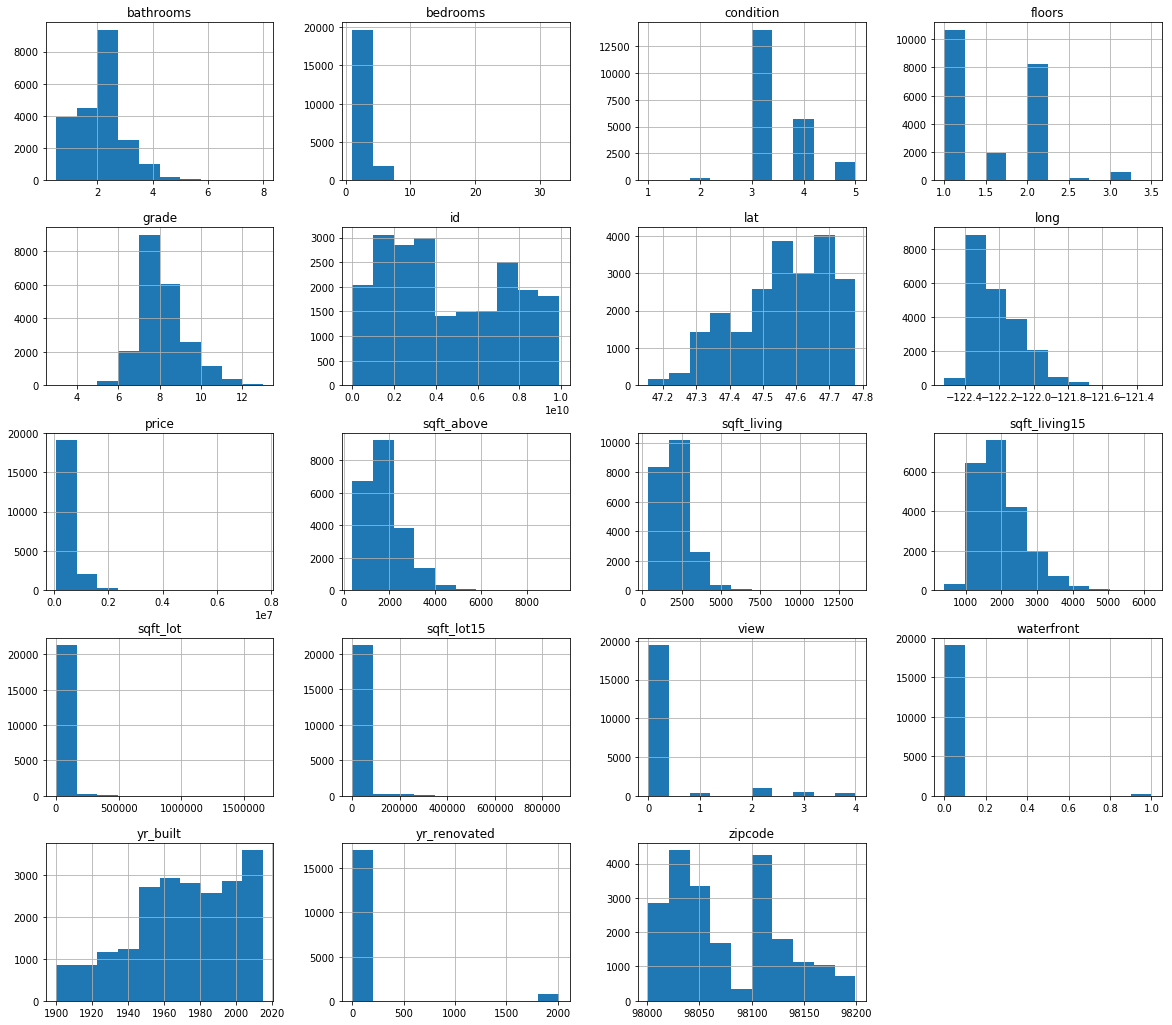

In [8]:
df.hist(figsize =(20,18));

In [9]:
#check for null values, NaNs:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
#drop the 63 NaN rows from view because this is such a small percentage of the overall data
df = df.dropna(subset=['view'])

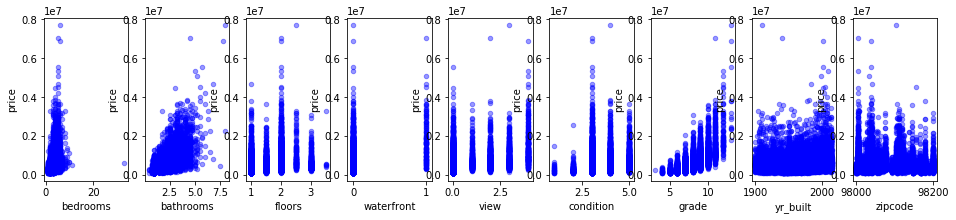

In [11]:
#check scatterplots to decide categorical variables:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [12]:
#floors, waterfront, view, condition, yr_built, and zipcode seem to be obvious categorical variables based on the vertical line structure
#bedrooms, bathrooms seem to be an edge case - but I am going to leave them as numeric variables given the positive linear relationship 
#grade also appears to be an edge case but it looks like a strong positive linear relationship with price - so I will leave this as a numeric variable
df.waterfront = df.waterfront.astype("str") 
df.floors = df.floors.astype("str") 
df.view = df.view.astype("str")
df.condition = df.condition.astype("str")
df.yr_built = df.yr_built.astype("str")
df.zipcode = df.zipcode.astype("str")

In [13]:
df.yr_renovated.value_counts()
#0.0 is a placeholder value here- maybe means wasn't renovated at all if there's no year?
#17,011 0.0 values - could drop this column entirely but think renovation should be a predictor of value 
#3842 NaNs - going to assume it wasn't renovated and add it to the 0.0 values 

0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1994.0       14
1985.0       14
1986.0       14
1987.0       14
1992.0       13
1997.0       12
1993.0       12
1996.0       11
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [14]:
df.yr_renovated = df.yr_renovated.fillna(value=0.0)

In [15]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
df.yr_renovated.value_counts()

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1994.0       14
1985.0       14
1986.0       14
1987.0       14
1992.0       13
1997.0       12
1993.0       12
1996.0       11
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [17]:
#20,791/21,597 = 96% of the data in the yr_renovated column so I suppose it makes more sense to drop the column 
df = df.drop('yr_renovated', axis = 1)

In [18]:
#check other columns for placeholder values 
for col in df:
    print('Values for  {}:\n{}\n\n'.format(col, df[col].unique()))

Values for  id:
[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]


Values for  date:
['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014' '10/7/2014'
 '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015' '5/14/2014'
 '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014' '6/26/2014'
 '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014' '6/13/2014'
 '12/30/2014' '2/13/2015' '6/20/2014' '7/15/2014' '8/11/2014' '7/7/2014'
 '10/28/2014' '7/29/2014' '7/18/2014' '3/25/2015' '7/16/2014' '4/28/2015'
 '3/11/2015' '9/16/2014' '2/17/2015' '12/31/2014' '2/5/2015' '3/3/2015'
 '8/19/2014' '4/7/2015' '8/27/2014' '2/23/2015' '12/10/2014' '8/28/2014'
 '10/21/2014' '12/7/2014' '6/3/2014' '9/9/2014' '10/9/2014' '8/25/2014'
 '6/12/2014' '9/12/2014' '1/5/2015' '6/10/2014' '7/10/2014' '3/16/2015'
 '11/5/2014' '4/20/2015' '6/9/2014' '3/23/2015' '12/2/2014' '12/22/2014'
 '1/28/2015' '6/2/

In [19]:
#this is a relatively useless column considering 90% of data is "0" - does this rank the view of the home...?
#will leave it since 10% of this could be useful...?
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [20]:
df.sqft_basement.value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
530.0       103
450.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
650.0        75
780.0        75
240.0        74
680.0        73
380.0        73
360.0        71
          ...  
2600.0        1
2310.0        1
2120.0        1
518.0         1
862.0         1
1281.0        1
4130.0        1
2490.0        1
2240.0        1
2610.0        1
1135.0        1
2350.0        1
946.0         1
935.0         1
861.0         1
1930.0        1
3260.0        1
875.0         1
906.0         1
143.0         1
1770.0        1
1840.0        1
2810.0        1
3480.0        1
295.0         1
1481.0        1
1913.0        1
602.0         1
20.0          1
1525.0        1
Name: sqft_basement, Len

In [21]:
#drop the 452 rows that contain '?' because this is only 2% of the data and think it makes more sense than inputting mean/median sqft_basement
df = df[df.sqft_basement != '?']

In [22]:
#0.0: represents homes with no basement 
df.sqft_basement.value_counts()

0.0       12798
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
750.0       104
530.0       103
450.0       103
480.0       102
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
1100.0       78
860.0        78
670.0        77
550.0        76
650.0        75
780.0        75
240.0        74
680.0        73
380.0        73
940.0        71
360.0        71
          ...  
2600.0        1
2310.0        1
2120.0        1
518.0         1
862.0         1
1281.0        1
4130.0        1
2490.0        1
2240.0        1
2610.0        1
1135.0        1
2350.0        1
946.0         1
935.0         1
861.0         1
1930.0        1
3260.0        1
875.0         1
906.0         1
143.0         1
1770.0        1
1840.0        1
2810.0        1
3480.0        1
295.0         1
1481.0        1
1913.0        1
602.0         1
20.0          1
1525.0        1
Name: sqft_basement, Len

In [23]:
#sqft_basement should be an int/float but it is currently an object datatype
df.sqft_basement = df.sqft_basement.astype('float64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 20 columns):
id               21082 non-null int64
date             21082 non-null object
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null object
waterfront       21082 non-null object
view             21082 non-null object
condition        21082 non-null object
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null object
zipcode          21082 non-null object
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
dtypes: float64(5), int64(8), object(7)
memory usage: 3.4+ MB


In [25]:
#fix waterfront "NaN"? - going to leave as "nan" for now - may change to match current distribution of 0.0 vs 1.0
df.waterfront.value_counts()

0.0    18608
nan     2333
1.0      141
Name: waterfront, dtype: int64

In [26]:
df.waterfront.value_counts(normalize=True)

0.0    0.882649
nan    0.110663
1.0    0.006688
Name: waterfront, dtype: float64

In [27]:
#11% of values are NaN and less than 1% are waterfront - makes this column pretty useless - going to drop alltogether
df = df.drop(['waterfront'], axis = 1)

In [28]:
#lets drop the date, and id columns because I don't think they will be relevant predictors for home price:
df = df.drop(['date', 'id'], axis = 1)

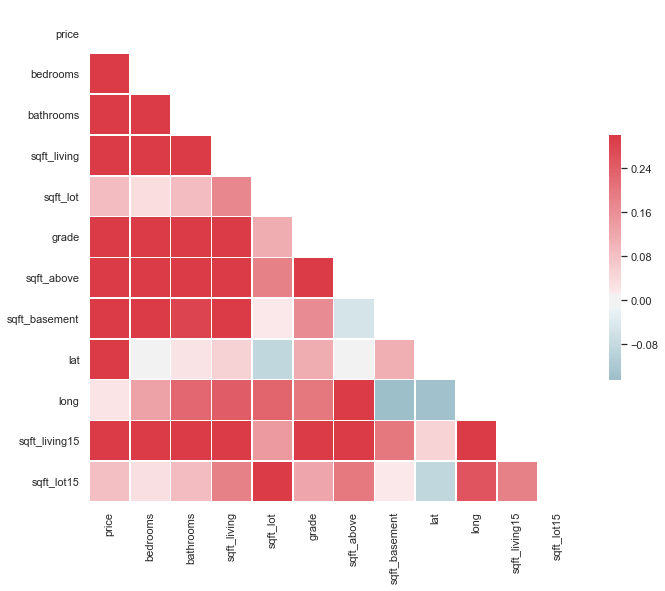

In [29]:
#check for multicollinearity (make sure columns within the dataset are not highly correlated)

#set the style of the visualization
sns.set(style = 'white')

#create a covariance matrix
corr = df.corr()

#generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidth=.5, cbar_kws={"shrink": .5})

In [30]:
#inspect correlation matrix further 
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308454,0.525029,0.702004,0.088400,0.668099,0.605481,0.323018,0.307667,0.022512,0.586495,0.083530
bedrooms,0.308454,1.000000,0.513694,0.577696,0.032531,0.356418,0.478967,0.301987,-0.009939,0.131398,0.391936,0.030779
bathrooms,0.525029,0.513694,1.000000,0.754793,0.088451,0.665992,0.685959,0.281813,0.025243,0.224660,0.569396,0.089414
sqft_living,0.702004,0.577696,0.754793,1.000000,0.173266,0.762719,0.876787,0.433369,0.053213,0.241473,0.756199,0.184920
sqft_lot,0.088400,0.032531,0.088451,0.173266,1.000000,0.113801,0.183653,0.015612,-0.085076,0.230489,0.143815,0.719499
grade,0.668099,0.356418,0.665992,0.762719,0.113801,1.000000,0.756289,0.166466,0.113629,0.199735,0.713176,0.122404
sqft_above,0.605481,0.478967,0.685959,0.876787,0.183653,0.756289,1.000000,-0.053403,-0.000014,0.344774,0.730794,0.195983
sqft_basement,0.323018,0.301987,0.281813,0.433369,0.015612,0.166466,-0.053403,1.000000,0.110526,-0.144709,0.200709,0.016705
lat,0.307667,-0.009939,0.025243,0.053213,-0.085076,0.113629,-0.000014,0.110526,1.000000,-0.135173,0.050357,-0.084799
long,0.022512,0.131398,0.224660,0.241473,0.230489,0.199735,0.344774,-0.144709,-0.135173,1.000000,0.334699,0.255272


In [31]:
abs(corr)>0.80

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,True,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False
grade,False,False,False,False,False,True,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False
lat,False,False,False,False,False,False,False,False,True,False,False,False
long,False,False,False,False,False,False,False,False,False,True,False,False


In [32]:
#interpretation of Correlation Heatmap above:
#are any of the predictor columns highly correlated enough that we should consider dropping them?
#there seems to be a lot of correlation amongst predictor columns - specifically bedrooms, bathrooms, sqft_living, floors, sqft_above, sqft_basement

In [33]:
#should probably drop sqft_above since it is redundent with sqft_living (r>0.80) 
df = df.drop(['sqft_above'], axis = 1)

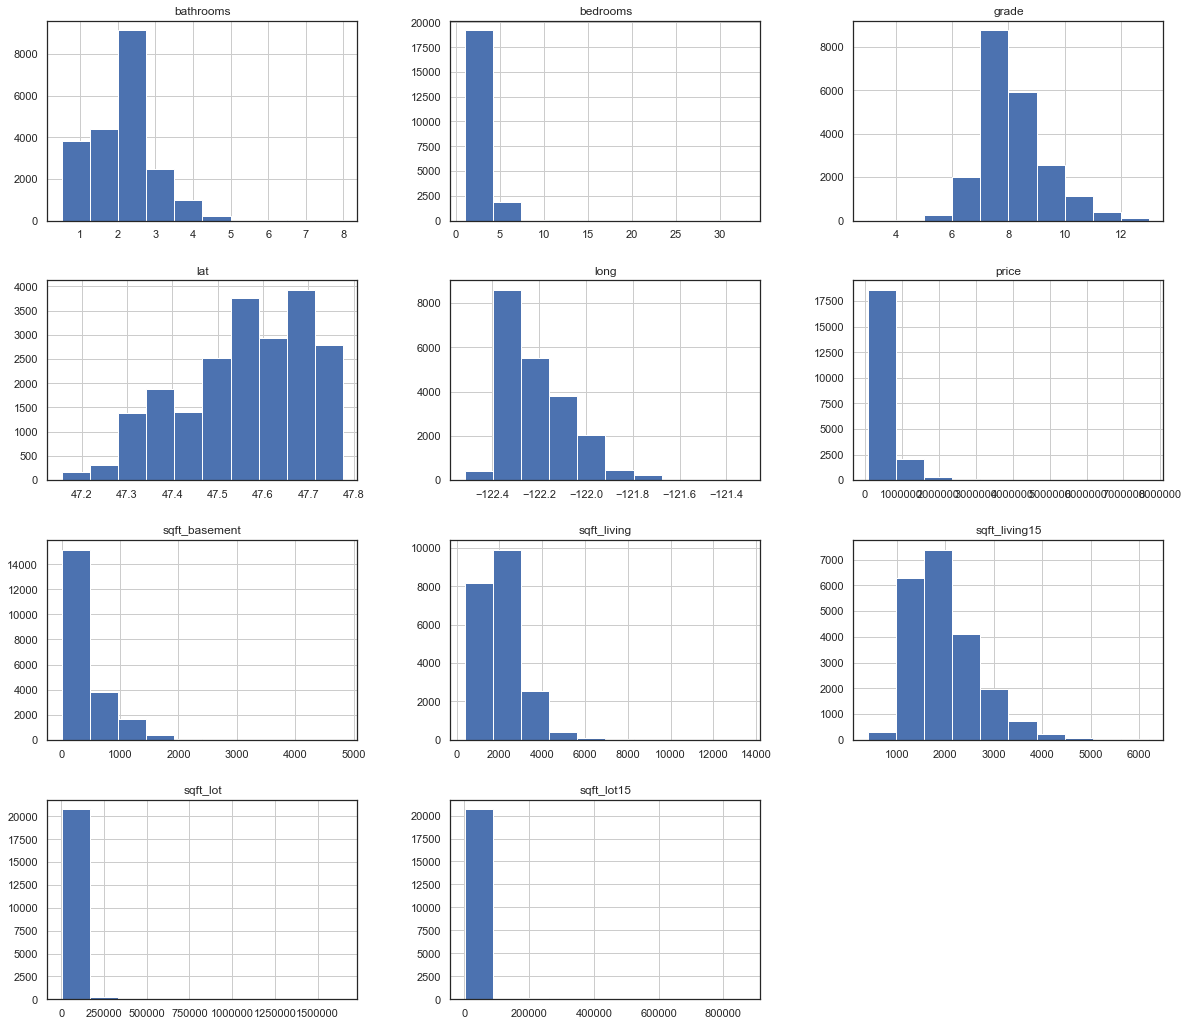

In [34]:
#check histograms again before normalizing numeric columns to the same scale:
df.hist(figsize =(20,18));

In [35]:
#Feature Scaling and Normalization:

#try including target variable, "price" in the log transformation 
#try log transformation to make distribution more normal (dont include long - long has negative values) 
for col in ['price', 'bathrooms', 'bedrooms', 'grade', 'lat', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']:
    df[col] = np.log(df[col] + 1)

In [36]:
#dont use min-max scaling on the target variable, "price"
#try min-max scaling to get values between 0 and 1 so you can look at model coefficients in an apples to apples way
for col in ['bathrooms', 'bedrooms', 'grade', 'lat', 'long', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']:
    df[col] = (df[col] - min(df[col])) / (max(df[col]) - min(df[col]))

In [37]:
#now try standardizing: (mean=0, and variance=1)
#for col in ['bathrooms', 'bedrooms', 'grade', 'lat', 'long', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']:
    #df[col] = (df[col] - df[col].mean()) / df[col].std()

In [38]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309987,0.244651,0.160558,0.321887,0.295712,1.0,0.0,3,0.553295,0.000000,1955,98178,0.573067,0.217608,0.441078,0.300037
1,13.195616,0.244651,0.431525,0.538143,0.326501,2.0,0.0,3,0.553295,0.706774,1951,98125,0.909488,0.166113,0.525634,0.341935
2,12.100718,0.143111,0.160558,0.203345,0.366525,1.0,0.0,3,0.446705,0.000000,1933,98028,0.936525,0.237542,0.699074,0.349422
3,13.311331,0.323410,0.547411,0.462852,0.280554,1.0,0.0,5,0.553295,0.803532,1965,98136,0.588493,0.104651,0.446476,0.283060
4,13.142168,0.244651,0.386853,0.420024,0.340082,1.0,0.0,3,0.647313,0.000000,1987,98074,0.742582,0.393688,0.548613,0.339440


In [39]:
#try dropping yr_built because it doesn't show a linear relationship with home prices:
df = df.drop(['yr_built'], axis=1)

In [40]:
#One-hot encoding Categorical Columns
df_onehot = pd.get_dummies(df)
df_onehot.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_basement,lat,long,sqft_living15,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309987,0.244651,0.160558,0.321887,0.295712,0.553295,0.000000,0.573067,0.217608,0.441078,...,0,0,0,0,0,0,1,0,0,0
1,13.195616,0.244651,0.431525,0.538143,0.326501,0.553295,0.706774,0.909488,0.166113,0.525634,...,0,0,0,0,0,0,0,0,0,0
2,12.100718,0.143111,0.160558,0.203345,0.366525,0.446705,0.000000,0.936525,0.237542,0.699074,...,0,0,0,0,0,0,0,0,0,0
3,13.311331,0.323410,0.547411,0.462852,0.280554,0.553295,0.803532,0.588493,0.104651,0.446476,...,0,0,0,0,0,0,0,0,0,0
4,13.142168,0.244651,0.386853,0.420024,0.340082,0.647313,0.000000,0.742582,0.393688,0.548613,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 97 columns):
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
grade            21082 non-null float64
sqft_basement    21082 non-null float64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
floors_1.0       21082 non-null uint8
floors_1.5       21082 non-null uint8
floors_2.0       21082 non-null uint8
floors_2.5       21082 non-null uint8
floors_3.0       21082 non-null uint8
floors_3.5       21082 non-null uint8
view_0.0         21082 non-null uint8
view_1.0         21082 non-null uint8
view_2.0         21082 non-null uint8
view_3.0         21082 non-null uint8
view_4.0         21082 non-null uint8
condition_1      21082 non-null u

In [42]:
#drop one categorical column from each categorical variable to reduce collinearity:
df_onehot = df_onehot.drop(['floors_1.0', 'view_0.0', 'condition_1', 'zipcode_98177'], axis=1)

In [43]:
#rename floors column names after getting dummy variables: 
prefix = 'floors'
cols = list(df_onehot)
for floor, val in enumerate(cols):
    if val.startswith(prefix):
        df_onehot.rename(index=str, columns={val: 'floor'}, inplace=True)

In [44]:
#rename view column names after getting dummy variables: 
prefix = 'view'
cols = list(df_onehot)
for view, val in enumerate(cols):
    if val.startswith(prefix):
        df_onehot.rename(index=str, columns={val: 'view'}, inplace=True)

In [45]:
#export our pandas df to a new csv file: do we need to do this?
#df_onehot.to_csv("kc_house_data_cleaned.csv", index=False)

In [46]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21082 entries, 0 to 21596
Data columns (total 93 columns):
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_living      21082 non-null float64
sqft_lot         21082 non-null float64
grade            21082 non-null float64
sqft_basement    21082 non-null float64
lat              21082 non-null float64
long             21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
floor            21082 non-null uint8
floor            21082 non-null uint8
floor            21082 non-null uint8
floor            21082 non-null uint8
floor            21082 non-null uint8
view             21082 non-null uint8
view             21082 non-null uint8
view             21082 non-null uint8
view             21082 non-null uint8
condition_2      21082 non-null uint8
condition_3      21082 non-null uint8
condition_4      21082 non-null uint8


In [47]:
#EDA - Exploratory Data Analysis
#check the distribution of various columns
#examine the descriptive stats of our data set
#create visualizations to help better understand data set

In [48]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,13.048219,0.268405,0.390830,0.454563,0.339284,0.609308,0.298390,0.651727,0.253453,0.564694,0.344776
std,0.526392,0.074138,0.139903,0.117794,0.111802,0.105414,0.373846,0.222609,0.116783,0.119318,0.112669
min,11.264477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.682310,0.244651,0.338291,0.375264,0.281542,0.553295,0.000000,0.508962,0.158638,0.479739,0.285811
50%,13.017005,0.244651,0.431525,0.455673,0.332811,0.553295,0.000000,0.671032,0.240033,0.556622,0.341699
75%,13.377007,0.323410,0.472886,0.535972,0.374891,0.647313,0.746365,0.840975,0.327243,0.647330,0.380576
max,15.856731,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


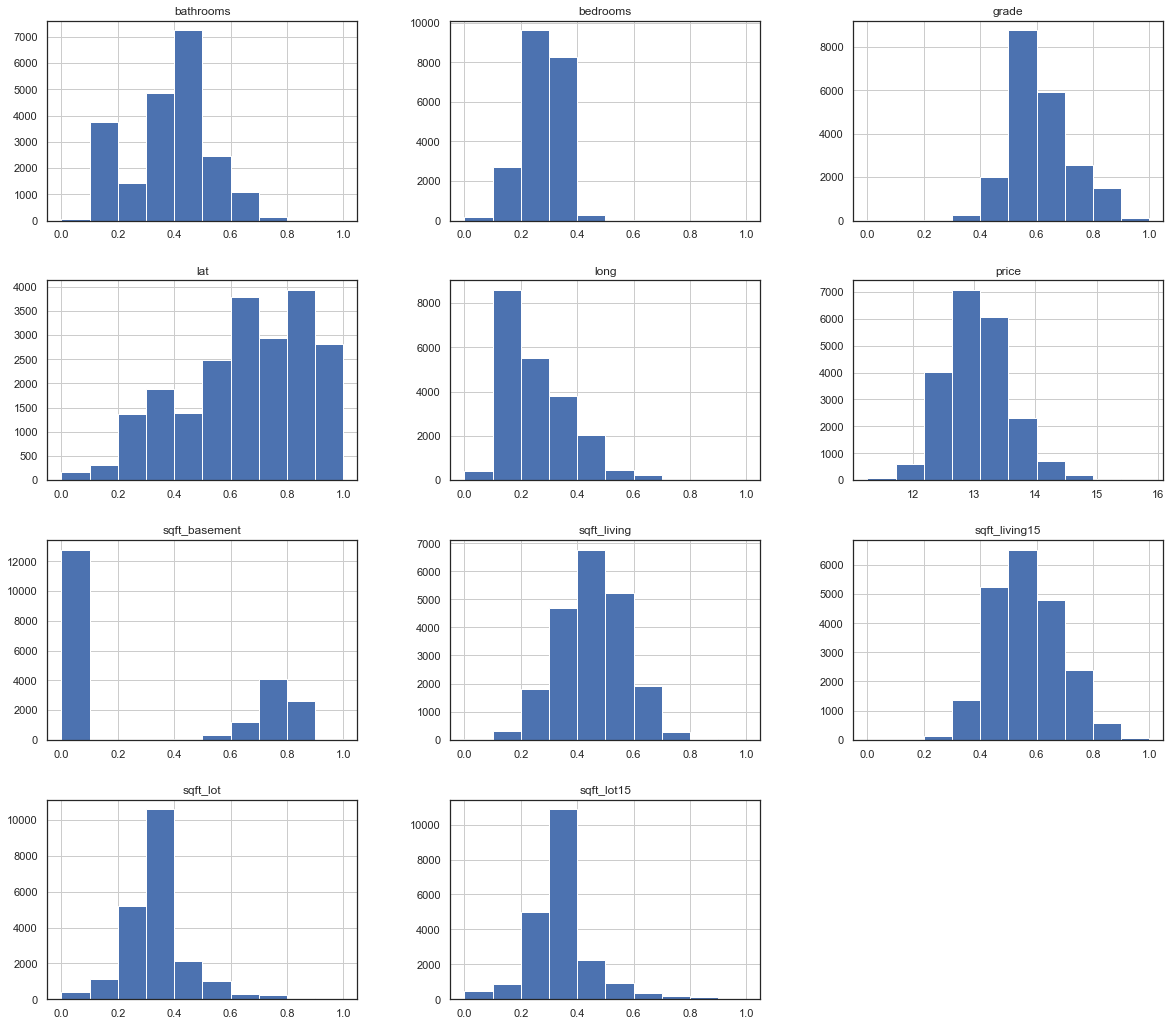

In [49]:
df.hist(figsize =(20,18));

In [50]:
#almost none of the data looks normally distributed
#there are some missing values and outliers 
#data might need extra preprocessing to clean it up

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


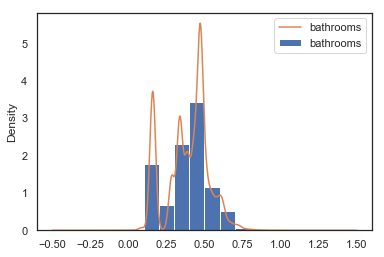

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


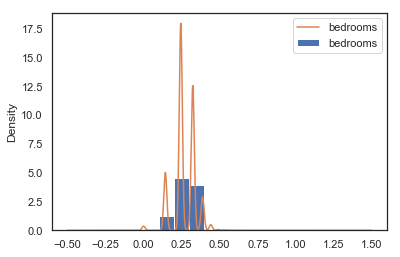

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


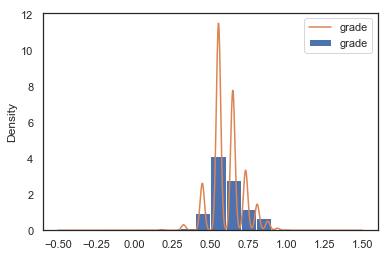

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


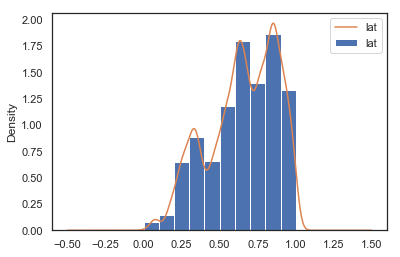

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


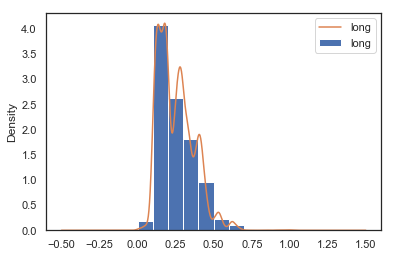

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


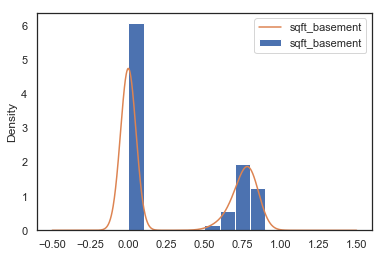

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


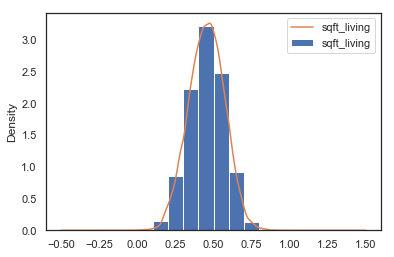

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


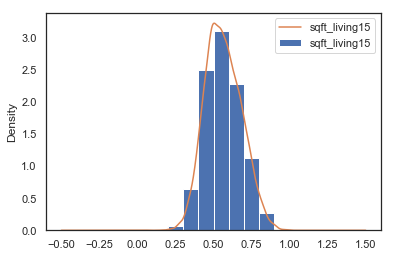

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


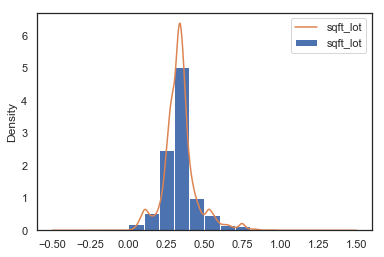

C:\Users\togara\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


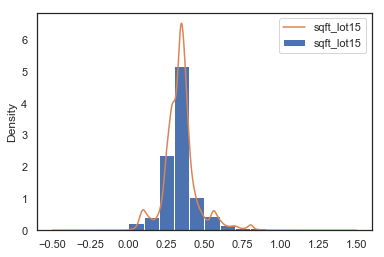

In [51]:
#Build normalized histograms with kde plots to explore distributions further:

for column in ['bathrooms', 'bedrooms', 'grade', 'lat', 'long', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()

In [52]:
#a lot of skewness and distributions that arean't normal - think about feature scacling to help normalize later 

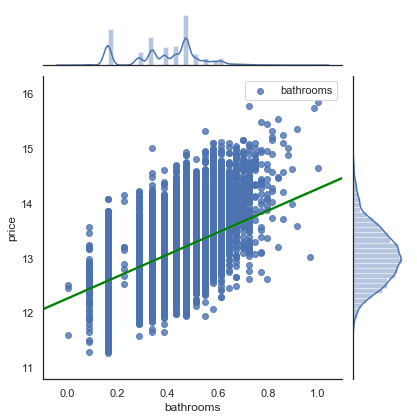

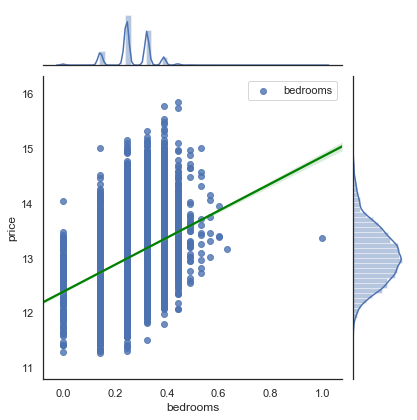

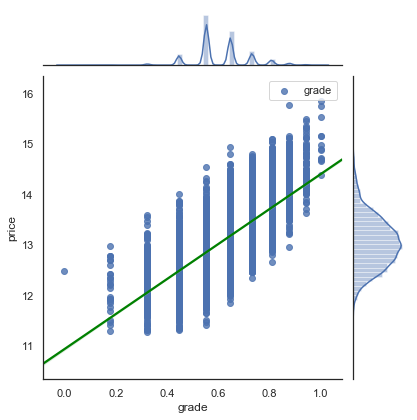

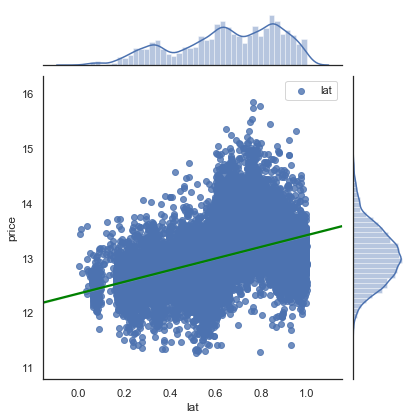

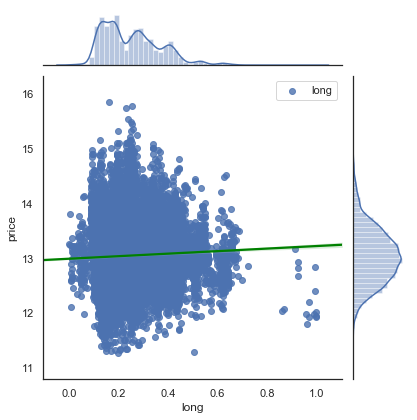

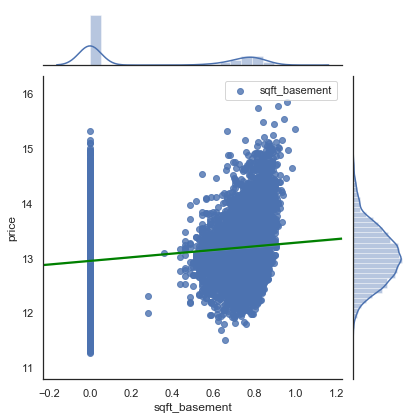

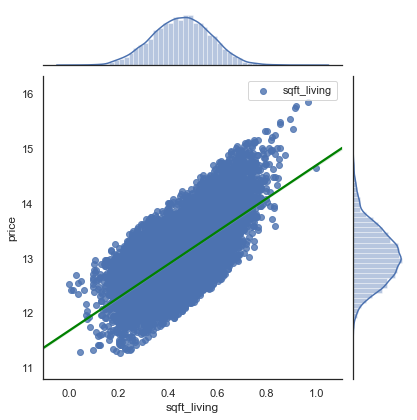

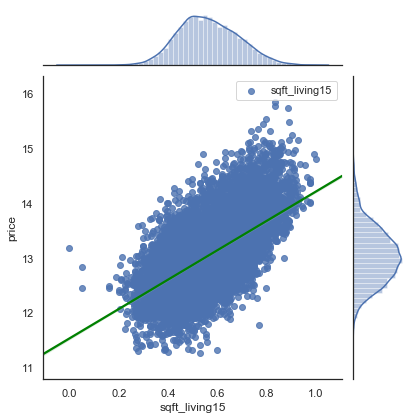

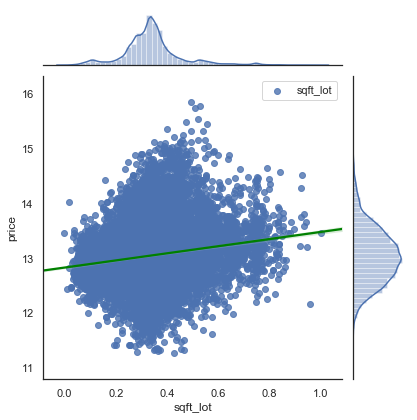

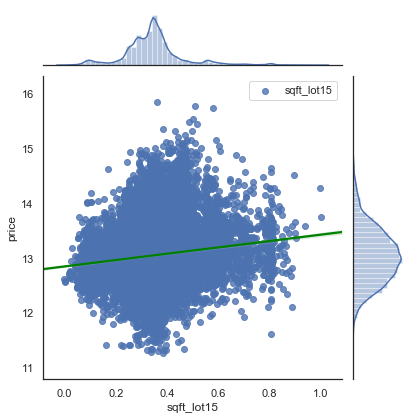

In [53]:
#Joint plots to check for the linearity (linear relationship w/ home prices) assumption between predictors and target variable:

for column in ['bathrooms', 'bedrooms', 'grade', 'lat', 'long', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']:
    sns.jointplot(x=column, y='price', data=df, kind='reg', label=column, joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

In [54]:
#joint plot observations for linearity assumption between predictors and target variable(price):

#bedrooms, bathrooms, and grade have somewhat of a linear relationships with price (although its pretty weak)
#lat has a weak linear relationship (maybe means closer to the water/further west?)
#long seems to have little to no relationship
#sqft_basement has a weak linear relationship
#grade, sqft_living, and sqft_living15 have relatively strong linear relationships with price
#sqft_lot and sqft_lot15 have some linear relationship, but its weak

#nothing has a negative linear relationship 

In [55]:
#Our normal distribution assumption isnt that strong, and our linear relationship assumption is just OK
#however this is good enough to build our initial model 
#possibly go back and pre-process data further and do another iteration of a model later

In [56]:
#Three questions and answer them through Exploratory Data Analysis (EDA):

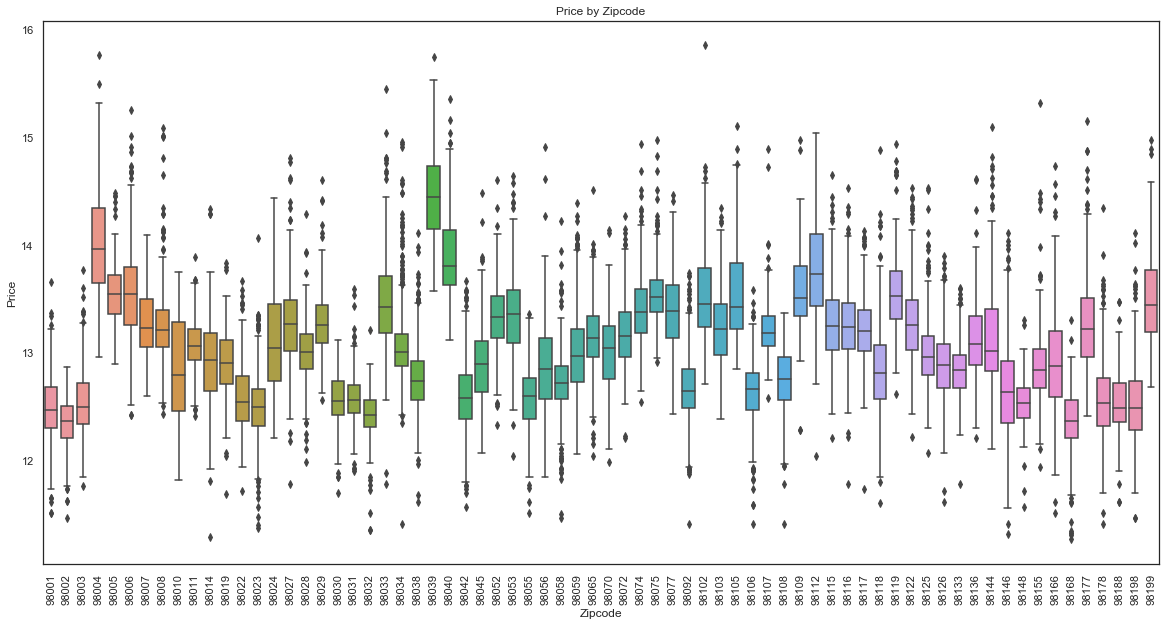

In [57]:
#1. What are the most expensive zipcodes of King County? 
x = df['zipcode']
y = df['price']

plt.figure(figsize=(20,10))
sns.boxplot(x=x, y=y, data=df)
plt.title('Price by Zipcode')
plt.xlabel('Zipcode')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()

In [58]:
#98004, 98039, 98040, 98112, and 98199 seem to have the highest median home values from the boxplot above
#also judging by the coefficients of longitude and latitude, you want to be in the northwestern area of King County 
#this would be in Medina, Bellevue, Mercer Island, and Seattle

In [59]:
#2a. what would you say is the most important factor when considering the value of a home in King County?

#judging by my model, "sqft_living" has the largest effect on home price 

In [60]:
#2b. What other factors are important when considering the value of a home?  
#grade, sqft_living15, lat, sqft_lot, bathrooms in that order according to my coefficients 

In [ ]:
#3. what effect does the yr_built have an home prices in King county? 
x = df['yr_built']
y = df['price']

plt.figure(figsize=(20,10))
sns.boxplot(x=x, y=y, data=df)
plt.title('Price by Year Built')
plt.xlabel('Year Built')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()

In [61]:
#it appears that the year built has very little impact on the home price 

In [62]:
###MODEL the data: (try to model using sklearn later)
#define the problem:
outcome = 'price'
predictors = df_onehot.drop('price', axis=1)

In [63]:
from statsmodels.formula.api import ols

In [64]:
#fitting the model:
pred_sum = '+'.join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula=formula, data=df_onehot).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1646.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:38:44   Log-Likelihood:                 5811.6
No. Observations:               21082   AIC:                        -1.144e+04
Df Residuals:                   20989   BIC:                        -1.070e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.9549      0.059    186.655      0.000      10.840      11.070
bedrooms         -0.2552      0.024    -10.684      0.000      -0.302      -0.208
bathrooms         0.1798      0.016     10.950      0.000       0.148       0.212
sqft_living       1.5118      0.027     55.100      0.000       1.458       1.566
sqft_lot          0.6256      0.030     20.897      0.000       0.567       0.684
grade             1.0027      0.022     46.034      0.000       0.960       1.045
sqft_basement    -0.0624      0.005    -13.359      0.000      -0.072      -0.053
lat               0.3064      0.046      6.703      0.000       0.217       0.396
long             -0.5190      0.064     -8.059      0.000      -0.645      -0.393
sqft_living15     0.4074      0.019     21.551      0.000       0.370       0.444
sqft_lot15       -0.0980      0.030     -3.290      0.001      -0.156      -0.040
floor[0]          0.0244      0.005      4.806      0.000       0.014       0.034
floor[1]          0.0085      0.004      2.014      0.044       0.000       0.017
floor[2]          0.0504      0.016      3.235      0.001       0.020       0.081
floor[3]         -0.0703      0.009     -7.446      0.000      -0.089      -0.052
floor[4]         -0.0362      0.070     -0.518      0.605      -0.173       0.101
view[0]           0.1188      0.011     11.285      0.000       0.098       0.139
view[1]           0.1151      0.006     17.798      0.000       0.102       0.128
view[2]           0.2029      0.009     23.130      0.000       0.186       0.220
view[3]           0.4891      0.011     44.462      0.000       0.468       0.511
condition_2       0.1269      0.038      3.360      0.001       0.053       0.201
condition_3       0.2417      0.035      6.880      0.000       0.173       0.311
condition_4       0.2755      0.035      7.838      0.000       0.207       0.344
condition_5       0.3416      0.035      9.658      0.000       0.272       0.411
zipcode_98001    -0.3449      0.035     -9.755      0.000      -0.414      -0.276
zipcode_98002    -0.2994      0.037     -8.130      0.000      -0.372      -0.227
zipcode_98003    -0.3419      0.035     -9.719      0.000      -0.411      -0.273
zipcode_98004     0.6889      0.020     34.564      0.000       0.650       0.728
zipcode_98005     0.2947      0.023     12.739      0.000       0.249       0.340
zipcode_98006     0.2426      0.023     10.748      0.000       0.198       0.287
zipcode_98007     0.2262      0.025      9.184      0.000       0.178       0.275
zipcode_98008     0.2449      0.023     10.808      0.000       0.201       0.289
zipcode_98010     0.0028      0.041      0.068      0.946      -0.078       0.083
zipcode_98011    -0.0884      0.020     -4.432      0.000      -0.127      -0.049
zipcode_98014    -0.0411      0.034     -1.202   

In [65]:
#go back and try to normalize data more through feature scaling (logs), and model validation

In [66]:
#iNterpret the initial model results:

#r^2 is 0.804 on the second iteration which means its a decent fit for linear regression 
#80.4% of variance in home prices are explained by the predictor/independent variables
#p-values are really low for all of my predictors other than a couple of individual categorical columns in yr_built and zipcode
#p-value of sqft_lot15 is just over 0.05(0.066), also coefficient is negative which is strange - consider dropping this column
#little strange that the coefficient for bedrooms is negative - would think this should be positive - maybe consider making bedrooms a categorical variable?
#there is significant positive skewness (4.322) and heavy kurtosis (76) (measure of heavy tailed and many outliers) - consider more feature scaling to normalize 

In [67]:
#drop sqft_lot15 because of high p-value:
df_onehot = df_onehot.drop(["sqft_lot15"], axis=1)

In [68]:
import statsmodels.api as sm
import scipy.stats as stats

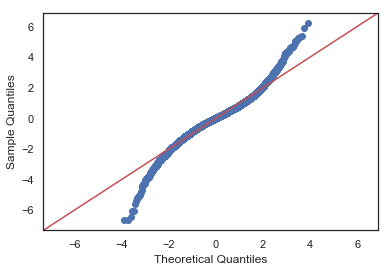

In [69]:
#check for normality again with a qqplot
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [70]:
#there are some extreme violations near the tails - again showing heavy kurtosis and positive skewness 

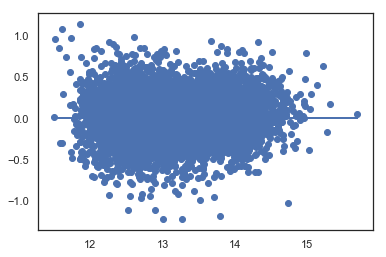

In [71]:
#Checking for Homoscedasticity:
plt.scatter(model.predict(predictors), model.resid)
plt.plot(model.predict(predictors), [0 for i in range(len(df_onehot))])

In [72]:
#there is some strong heteroscedasticity (variance of errors isn't the same throughout) 
#there are some outliers that show disproportionate errors. Could eliminate some of these outliers to make errors more homoscedastic 

In [73]:
#Model Refinement to address error variability:
for i in range(90,99):
    q = i / 100
    print('{} percentile: {}'.format(q, df_onehot['price'].quantile(q=q)))

0.9 percentile: 13.697852514490348
0.91 percentile: 13.732130035981154
0.92 percentile: 13.76421831620775
0.93 percentile: 13.813475989355588
0.94 percentile: 13.883170141017091
0.95 percentile: 13.963931425151141
0.96 percentile: 14.04662307257814
0.97 percentile: 14.144815024531075
0.98 percentile: 14.285514812209815


In [74]:
subset = df_onehot[df_onehot['price'] < 1250000]
print('Percent removed:', (len(df_onehot) - len(subset))/len(df_onehot))
outcome = 'price'
predictors = subset.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + "~" + pred_sum
model = ols(formula=formula, data=subset).fit()
model.summary()

Percent removed: 0.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     1663.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        10:42:15   Log-Likelihood:                 5806.2
No. Observations:               21082   AIC:                        -1.143e+04
Df Residuals:                   20990   BIC:                        -1.070e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.9557      0.059    186.625      0.000      10.841      11.071
bedrooms         -0.2547      0.024    -10.660      0.000      -0.301      -0.208
bathrooms         0.1812      0.016     11.035      0.000       0.149       0.213
sqft_living       1.5150      0.027     55.241      0.000       1.461       1.569
sqft_lot          0.5446      0.017     32.027      0.000       0.511       0.578
grade             1.0008      0.022     45.953      0.000       0.958       1.043
sqft_basement    -0.0624      0.005    -13.367      0.000      -0.072      -0.053
lat               0.3076      0.046      6.728      0.000       0.218       0.397
long             -0.5327      0.064     -8.287      0.000      -0.659      -0.407
sqft_living15     0.3995      0.019     21.300      0.000       0.363       0.436
floor[0]          0.0249      0.005      4.910      0.000       0.015       0.035
floor[1]          0.0090      0.004      2.120      0.034       0.001       0.017
floor[2]          0.0513      0.016      3.293      0.001       0.021       0.082
floor[3]         -0.0692      0.009     -7.336      0.000      -0.088      -0.051
floor[4]         -0.0327      0.070     -0.467      0.641      -0.170       0.104
view[0]           0.1188      0.011     11.275      0.000       0.098       0.139
view[1]           0.1153      0.006     17.828      0.000       0.103       0.128
view[2]           0.2030      0.009     23.134      0.000       0.186       0.220
view[3]           0.4885      0.011     44.403      0.000       0.467       0.510
condition_2       0.1243      0.038      3.292      0.001       0.050       0.198
condition_3       0.2382      0.035      6.782      0.000       0.169       0.307
condition_4       0.2715      0.035      7.728      0.000       0.203       0.340
condition_5       0.3375      0.035      9.547      0.000       0.268       0.407
zipcode_98001    -0.3428      0.035     -9.694      0.000      -0.412      -0.273
zipcode_98002    -0.2966      0.037     -8.056      0.000      -0.369      -0.224
zipcode_98003    -0.3403      0.035     -9.672      0.000      -0.409      -0.271
zipcode_98004     0.6905      0.020     34.647      0.000       0.651       0.730
zipcode_98005     0.2966      0.023     12.822      0.000       0.251       0.342
zipcode_98006     0.2457      0.023     10.894      0.000       0.202       0.290
zipcode_98007     0.2297      0.025      9.329      0.000       0.181       0.278
zipcode_98008     0.2482      0.023     10.961      0.000       0.204       0.293
zipcode_98010     0.0046      0.041      0.113      0.910      -0.076       0.085
zipcode_98011    -0.0861      0.020     -4.319      0.000      -0.125      -0.047
zipcode_98014    -0.0398      0.034     -1.162      0.245      -0.107       0.027
zipcode_98019    -0.1078      0.028     -3.807   

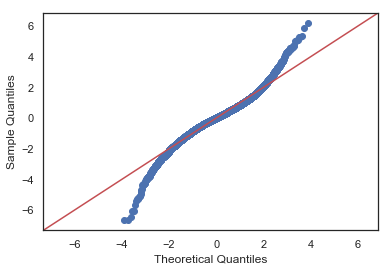

In [75]:
#recheck Normality
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

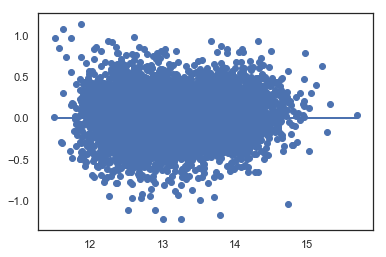

In [76]:
#recheck Homoscedasticity:
plt.scatter(model.predict(predictors), model.resid)
plt.plot(model.predict(predictors), [0 for i in range(len(subset))])

In [77]:
#not perfect but much much better than before in terms of normality and homoscedasticity!
#my R-squared also improved to 0.839, and my skew is down to 0.617 and kurtosis is down to 6.427 which are major improvements

In [78]:
###Paragraph explaining final model and commentary on coefficients

#R-squared is 0.878 which means 87.9% of the variance of home prices is explained by the independent variables, predictor variables
#skew is close to zero, indicates pretty solid normal distribution 
#Kurtosis is 5.6 which means there is some heavyness in the tail of the data, and some outliers (although a lot of this was solved through my model refinement to eliminate 5% of the data)
#normal distribution and linearity is solid for this model as evidenced by the qqplot - the values tail off in the beginning and at the end 
#Homoscedasticity is solid for thie model as evidenced by the scatter plot of the residuals - 

###Coefficients:

#bedrooms had a negative coefficient which was surprising given I would assume more bedrooms means higher price of the home
#of the numeric independent variables, sqft_living seems to have the largest positive coefficient which makes sense
#next largest positive numeric independent variable coefficients were: grade, sqft_living15, lat, sqft_lot, bathrooms in that order
#sqft_basement also had a negative coefficient which is a little surprising 
#large positive coefficient for lat tells you homes in the north are more valuable
#negative long coefficient tells you homes in the west (closer to the water) are more valuable, which makes sense 

#several individual categorical variable coefficients had p-values larger than 0.05 
#condition's coefficient went up with how high the condition was (condition_5 had by far the largest coefficient which makes sense)
#yr_built nothing that important to note other than homes built in early 1900s seem to have good value and homes built in later 2000s have good value
#zipcode categorical variable nothing too important to note

In [79]:
#Perform a train-test-split 
y = subset['price']
X = subset.drop('price', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [80]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

14757 6325 14757 6325


In [81]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [82]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [83]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.034076607061633214
Test Mean Squarred Error: 0.032997092011984586


In [ ]:
#MSE close to 0 is great!!

In [85]:
#Holdout Validation or train/test split using Sklearn:
from sklearn.model_selection import train_test_split
X = subset.drop('price', axis=1)
y = subset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [86]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

15811 5271 15811 5271


In [87]:
#applying your model to the train set
#importing and initializing the model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#fitting the model to the train data
linreg.fit(X_train, y_train)
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#calculating predictions on the train set, and on the test set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [88]:
#should be about what a home price is
print(y_hat_train[:5])

[13.53298008 13.83462244 13.0226036  12.85066381 12.58019713]


In [89]:
#Calculating the residuals 
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [90]:
#Sklearn's function mean_squared_error:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
print("Train Mean Squared Error:", mse_train)
print("Test Mean Squared Error:", mse_test)

Train Mean Squared Error: 0.0339654030092899
Test Mean Squared Error: 0.03334922463477668


In [91]:
#what is the % difference between these?
(mse_test - mse_train)/(mse_test)

-0.018476542746084363

In [92]:
#very small difference between the train and test Mean Squared Errors - probably does well with predicting future cases of home prices

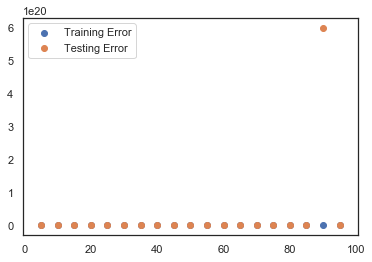

In [93]:
#Evaluating the effect of train-test split size
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [94]:
#K-Fold Cross Validation using Sklearn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))

In [95]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.03436667627911941
-0.034363221778696884
-0.034363221778696884


In [96]:
#these MSEs are close to zero as well!

In [97]:
#try Feature ranking with recursive feature elimination for fun

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

X = subset.drop('price', axis=1) 
y = subset['price']

r_list = []
adj_r_list = []
list_n = list(range(5,212,10)) #start, stop, step
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

0.7123041051941722
0.7110568290423223
0.7847992898695567
0.7838663091824738
0.8281418133610391
0.8273967397553151
0.8509678159647838
0.8503217021607244
0.861142593035469
0.8605405909376238
0.8682878001751745
0.8677167753927038
0.8744554108650119
0.8739111251284095
0.8776812373516536
0.8771509368561319
0.8781624092008338
0.8776341947766926
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075
0.8781817428654216
0.8776536122604075


In [98]:
#the more features we have the larger the r-squared becomes, which is typical

In [101]:
#Checking for Multicollinearity using variance inflation factor. 
#this accounts for multicollinearity with a relation of 3 or more variables vs just 2 variables in the pairwise heatmap
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = subset.drop(['price'], axis=1) 
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))

[('bedrooms', 27.43936322112261),
 ('bathrooms', 28.899237707052393),
 ('sqft_living', 102.81077627409047),
 ('sqft_lot', 22.845588831113602),
 ('grade', 112.24690739331463),
 ('sqft_basement', 3.1025613421357163),
 ('lat', 273.2524962797792),
 ('long', 193.36742543893328),
 ('sqft_living15', 72.38936688954992),
 ('floor', 1.4059878707820597),
 ('floor', 4.266375251366034),
 ('floor', 1.1034480605684647),
 ('floor', 1.5573844297385897),
 ('floor', 1.0107382278913626),
 ('view', 1.0703526808346429),
 ('view', 1.1481992787171456),
 ('view', 1.1259385931881711),
 ('view', 1.1098055988207716),
 ('condition_2', 4.837279868308839),
 ('condition_3', 321.7072792016948),
 ('condition_4', 129.5277054533042),
 ('condition_5', 39.66082642763849),
 ('zipcode_98001', 6.3668521944742205),
 ('zipcode_98002', 4.321607975372223),
 ('zipcode_98003', 4.862212477660245),
 ('zipcode_98004', 3.1602823408337417),
 ('zipcode_98005', 2.376932755466405),
 ('zipcode_98006', 5.872373571291938),
 ('zipcode_98007', 

In [100]:
#seems there are some definite multicollinearity problems with the model - most continuous variables have a vif over 10
#how would one fix this? - too many variables to get rid of 

In [ ]:
#Overall Questions:
#did I need to use "binning" for my categorical variables? - i did not
#should I have deleted one column from each categorical variable after creating dummies? - fixed this
#should I have made a "categorical predictor model" by combining categorical variables into one variable each?
#should I have made bedrooms, bathrooms, grade categorical variables? (i think there was a lienar relationship with bathrooms and grade)
#is it OK my MSE is so high? - fixed this with log transformation of "price"
#is it ok that there seems to be high VIF among my variables? - this indicates strong multicollinearity 